# Assignment 2: Finance

```
Created By: Ravi Kasarla
Creation Date: 02-SEP-2019
Last Updated: 08-SEP-2019
Base source: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
```

In [646]:
import pandas as pd
import datetime
from pandas import Series, DataFrame

### Get stock data from Yahoo Finance
```
URL: https://finance.yahoo.com/quote/AAPL/history?p=AAPL
Make sure to adjust data range, apply and then download the file
and save it in data directory under the current folder
```

In [647]:
df = pd.read_csv('data/AAPL.csv', header=0, index_col='Date', parse_dates=True)

In [648]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-09-02,24.63,24.79,23.57,23.74,20.72,195190800
2008-09-03,23.83,24.10,23.43,23.85,20.82,183708700
2008-09-04,23.69,23.99,22.97,23.03,20.10,185846500
2008-09-05,22.66,23.20,22.52,22.88,19.97,196721000
2008-09-08,23.51,23.56,21.64,22.56,19.69,261494800


In [649]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-26,205.86,207.19,205.06,206.49,206.49,26043600
2019-08-27,207.86,208.55,203.53,204.16,204.16,25873300
2019-08-28,204.10,205.72,203.32,205.53,205.53,15938800
2019-08-29,208.50,209.32,206.66,209.01,209.01,20990500
2019-08-30,210.16,210.45,207.20,208.74,208.74,21143400


### Moving Average

In [650]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [651]:
mavg.tail()

Date
2019-08-26   198.09
2019-08-27   198.19
2019-08-28   198.29
2019-08-29   198.39
2019-08-30   198.50
Name: Adj Close, dtype: float64

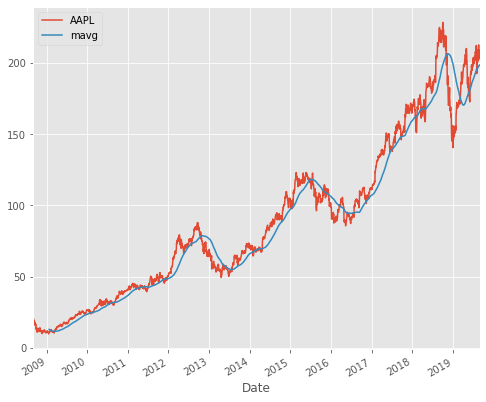

In [652]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend();

### Return Deviation — to determine risk and return
```
Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.

Following is the formula you could refer to:
rt = (pt / (pt-1)) - 1
```

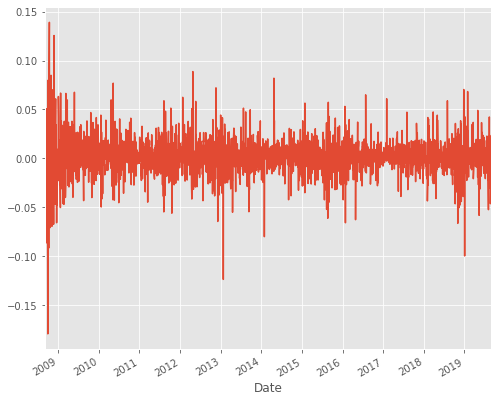

In [653]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return');

### Predicting Stocks Price
```
We will be using the following models:
Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN)
```

In [654]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [655]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2008-09-02,20.72,195190800,5.11,-3.60
2008-09-03,20.82,183708700,2.80,0.07
2008-09-04,20.10,185846500,4.40,-2.80
2008-09-05,19.97,196721000,2.97,1.00
2008-09-08,19.69,261494800,8.50,-4.04


In [656]:
import math
import numpy as np
import sklearn.preprocessing as preprocessing

In [657]:
# Example Dealing with NaN
d = {'filename': ['M66_MI_NSRh35d32kpoints.dat', 'F71_sMI_DMRI51d.dat', 'F62_sMI_St22d7.dat', 'F41_Car_HOC498d.dat', 'F78_MI_547d.dat'], 'alpha1': [0.8016, 0.0, 1.721, 1.167, 1.897], 'alpha2': [0.9283, 0.0, 3.833, 2.809, 5.459], 'gamma1': [1.0, np.nan, 0.23748000000000002, 0.36419, 0.095319], 'gamma2': [0.074804, 0.0, 0.15, 0.3, np.nan], 'chi2min': [39.855990000000006, 1e+25, 10.91832, 7.966335000000001, 25.93468]}
dfe = pd.DataFrame(d).set_index('filename')

In [658]:
dfe

,alpha1,alpha2,gamma1,gamma2,chi2min
filename,,,,,
M66_MI_NSRh35d32kpoints.dat,0.80,0.93,1.00,0.07,39.86
F71_sMI_DMRI51d.dat,0.00,0.00,nan,0.00,10000000000000000905969664.00
F62_sMI_St22d7.dat,1.72,3.83,0.24,0.15,10.92
F41_Car_HOC498d.dat,1.17,2.81,0.36,0.30,7.97
F78_MI_547d.dat,1.90,5.46,0.10,nan,25.93


In [659]:
# If there are any NaN get that into a new DF
dfenan = dfe[dfe.isna().any(axis=1)]

In [660]:
dfenan

,alpha1,alpha2,gamma1,gamma2,chi2min
filename,,,,,
F71_sMI_DMRI51d.dat,0.00,0.00,nan,0.00,10000000000000000905969664.00
F78_MI_547d.dat,1.90,5.46,0.10,nan,25.93


In [661]:
# Fill NaN with 
dfe = dfe.fillna(dfe.mean())

In [662]:
dfe

,alpha1,alpha2,gamma1,gamma2,chi2min
filename,,,,,
M66_MI_NSRh35d32kpoints.dat,0.80,0.93,1.00,0.07,39.86
F71_sMI_DMRI51d.dat,0.00,0.00,0.42,0.00,10000000000000000905969664.00
F62_sMI_St22d7.dat,1.72,3.83,0.24,0.15,10.92
F41_Car_HOC498d.dat,1.17,2.81,0.36,0.30,7.97
F78_MI_547d.dat,1.90,5.46,0.10,0.13,25.93


In [663]:
# Check if there are any NaN
dfreg[dfreg.isna().any(axis=1)]

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,


In [664]:
# In this data set there are no NaNs, just in case you have NaN's replace with Average
dfreg.fillna(value=dfreg.mean(), inplace=True)

In [665]:
# Drop missing value
# dfreg.fillna(value=-99999, inplace=True)

In [666]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
forecast_out

28

In [667]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2008-09-02,20.72,195190800,5.11,-3.60
2008-09-03,20.82,183708700,2.80,0.07
2008-09-04,20.10,185846500,4.40,-2.80
2008-09-05,19.97,196721000,2.97,1.00
2008-09-08,19.69,261494800,8.50,-4.04


In [668]:
# Separating the label here, we want to predict the AdjClose
# Note you have shifted Label with 28, so your label has 28 days future value
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)

In [669]:
dfreg.head(2)

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2008-09-02,20.72,195190800,5.11,-3.60,12.07
2008-09-03,20.82,183708700,2.80,0.07,13.75


In [670]:
dfreg.tail(2)

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2019-08-29,209.01,20990500,1.27,0.24,nan
2019-08-30,208.74,21143400,1.56,-0.68,nan


In [671]:
dfreg.shape

(2769, 5)

In [672]:
dfregNoy = dfreg.drop(['label'],1)

In [673]:
dfregNoy.shape

(2769, 4)

In [674]:
dfregNoy.head(2)

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2008-09-02,20.72,195190800,5.11,-3.60
2008-09-03,20.82,183708700,2.80,0.07


In [675]:
X = dfregNoy

In [676]:
X.shape

(2769, 4)

In [677]:
# First two rows -- if numpy
# X[:2,:]

In [678]:
# Last two rows -- if numpy
# X[-2:,:]

In [679]:
pd.options.display.float_format = '{:.2f}'.format

In [680]:
dfreg.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,2769.00,89.38,55.63,9.75,43.69,78.35,118.84,228.52
Volume,2769.00,90066121.31,76191485.04,11362000.00,34309500.00,68722500.00,118724200.00,655514300.00
HL_PCT,2769.00,2.08,1.51,0.42,1.21,1.72,2.48,23.96
PCT_change,2769.00,0.00,1.53,-12.00,-0.76,0.04,0.79,12.95
label,2741.00,90.12,55.42,9.75,44.44,79.39,119.07,228.52


In [681]:
X = np.array(dfreg.drop(['label'], 1))

In [682]:
X = preprocessing.scale(X)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [683]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [684]:
X.shape

(2741, 4)

In [685]:
X_lately.shape

(28, 4)

In [686]:
# Separate label and identify it as y
y = dfreg['label']
y = y[:-forecast_out]

In [687]:
y.shape

(2741,)

In [688]:
from sklearn.model_selection import train_test_split

In [689]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [690]:
from sklearn.preprocessing import MinMaxScaler

In [691]:
sclar = MinMaxScaler()

In [692]:
# X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns = X_train.columns,index=X_train.index)
X_train = pd.DataFrame(data=scaler.fit_transform(X_train))

In [693]:
# X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)
X_test = pd.DataFrame(data=scaler.transform(X_test))

### Model Generation

In [694]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [695]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [696]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [697]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [698]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [699]:
confidencereg = clfreg.score(X_test, y_test)
confidencereg

0.969383624592436

In [700]:
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly2

0.9711216557916739

In [701]:
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidencepoly3

0.9657380974796047

In [702]:
confidenceknn = clfknn.score(X_test, y_test)
confidenceknn

0.9578026483610361

In [703]:
# Predict Y using linear regression
forecast_set = clfreg.predict(X_lately)

In [704]:
forecast_set

array([206.61, 205.15, 205.73, 207.40, 206.27, 210.25, 206.51, 201.82,
       191.53, 195.18, 197.42, 201.56, 199.96, 199.45, 207.98, 201.33,
       200.88, 205.10, 208.79, 208.77, 210.98, 211.01, 201.95, 204.98,
       203.17, 204.39, 207.61, 207.43])

In [705]:
np.set_printoptions(formatter={'float_kind':'{:0.2f}'.format})

In [706]:
forecast_set

array([206.61, 205.15, 205.73, 207.40, 206.27, 210.25, 206.51, 201.82,
       191.53, 195.18, 197.42, 201.56, 199.96, 199.45, 207.98, 201.33,
       200.88, 205.10, 208.79, 208.77, 210.98, 211.01, 201.95, 204.98,
       203.17, 204.39, 207.61, 207.43])

In [707]:
dfreg['Forecast'] = np.nan

In [708]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2008-09-02,20.72,195190800,5.11,-3.60,12.07,nan
2008-09-03,20.82,183708700,2.80,0.07,13.75,nan
2008-09-04,20.10,185846500,4.40,-2.80,12.98,nan
2008-09-05,19.97,196721000,2.97,1.00,12.21,nan
2008-09-08,19.69,261494800,8.50,-4.04,12.70,nan


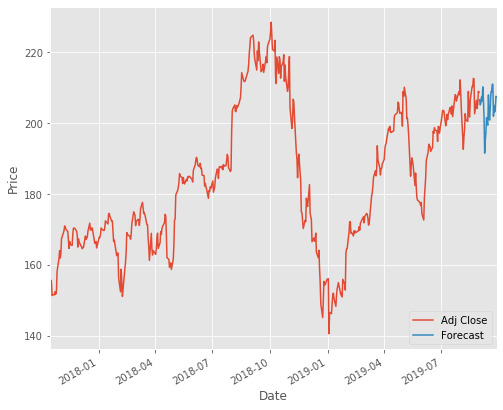

In [709]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()